In [1]:
%%shell
pip install gensim

In [20]:
import numpy as np
import gensim.downloader as api
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [3]:
api.info()["models"].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [4]:
model = api.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded


# Visualizacion

## PCA

In [21]:
A = np.random.normal(size=(2, 2))
A

array([[-0.33887775,  0.49296164],
       [ 1.19152998,  0.18673203]])

In [22]:
vect = np.array([[1.], [1.]])
vect

array([[1.],
       [1.]])

In [31]:
vect2 = A @ vect
vect2

array([[0.15408389],
       [1.37826201]])

[(-1.0, 1.0), (-1.0, 1.0)]

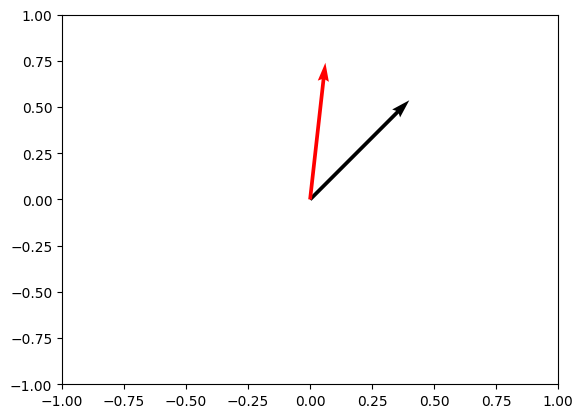

In [33]:
fig, ax = plt.subplots()
ax.quiver(0, 0, vect[0], vect[1], scale=5)
ax.quiver(0, 0, vect2[0], vect2[1], scale=5, color="r")
ax.set(xlim=[-1, 1], ylim=[-1, 1])

In [36]:
def degree2vec(degree: float) -> np.array:
    vect = np.array([np.cos(degree), np.sin(degree)]).reshape(-1, 1)
    return vect

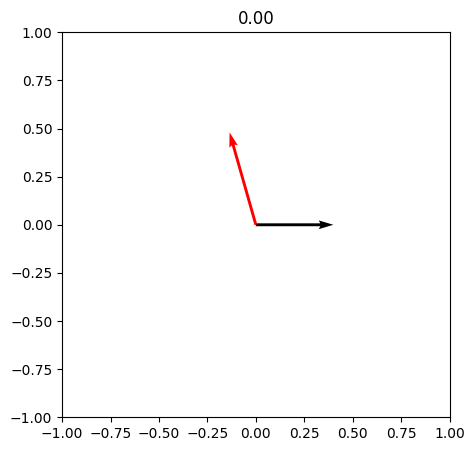

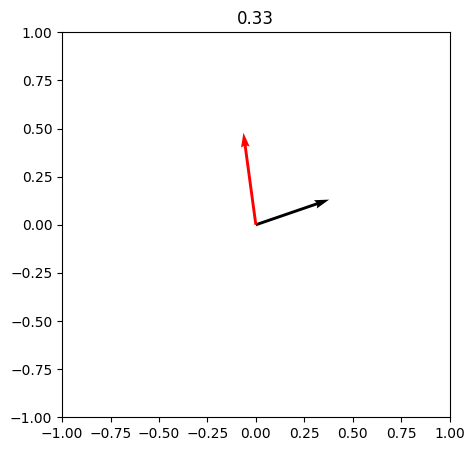

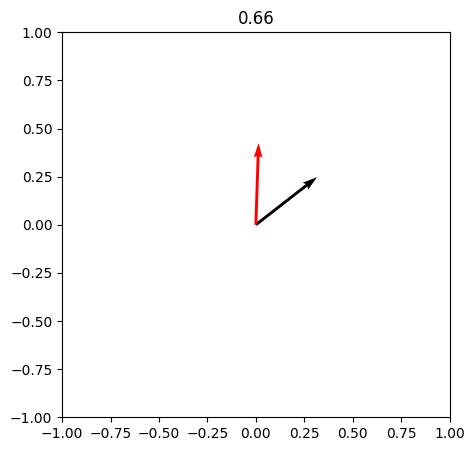

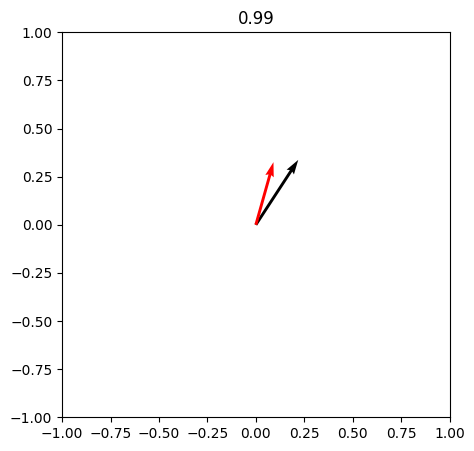

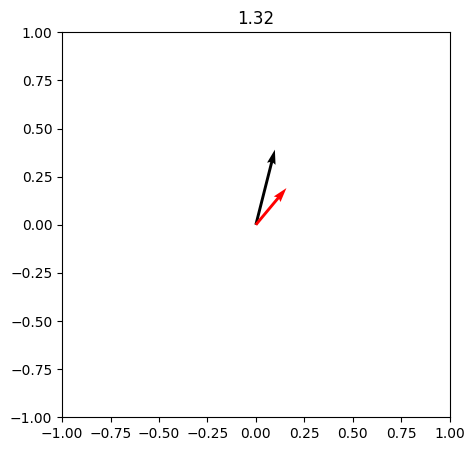

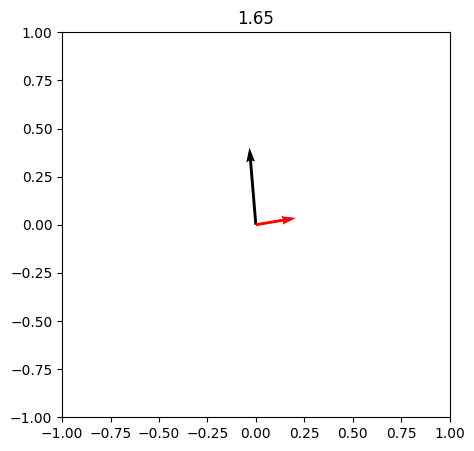

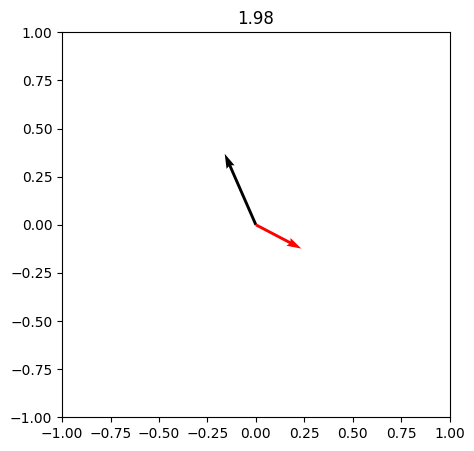

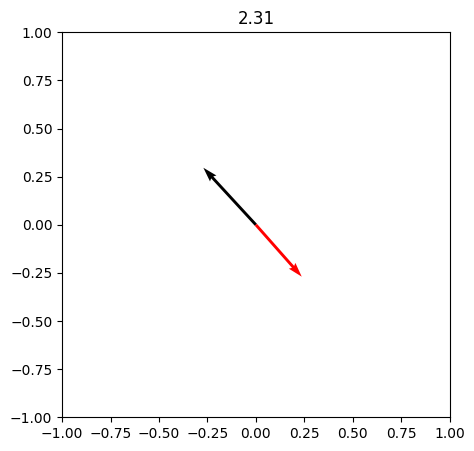

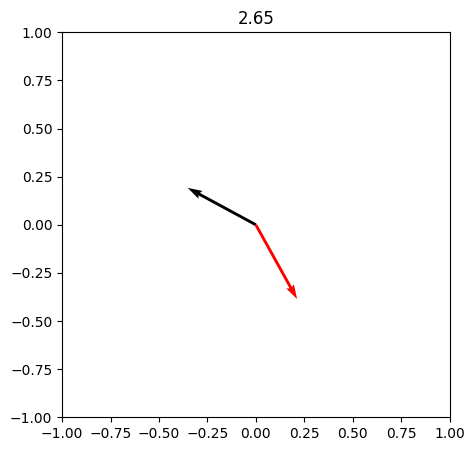

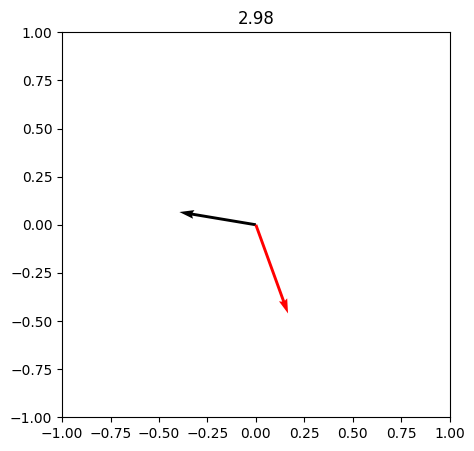

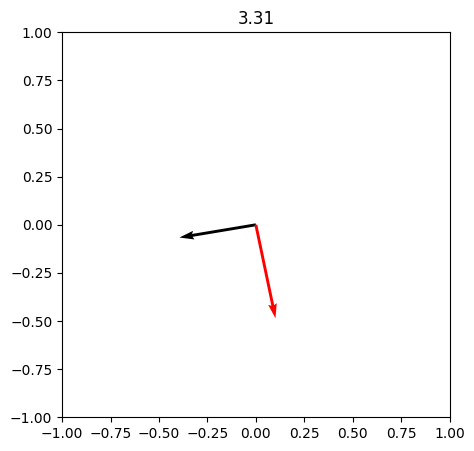

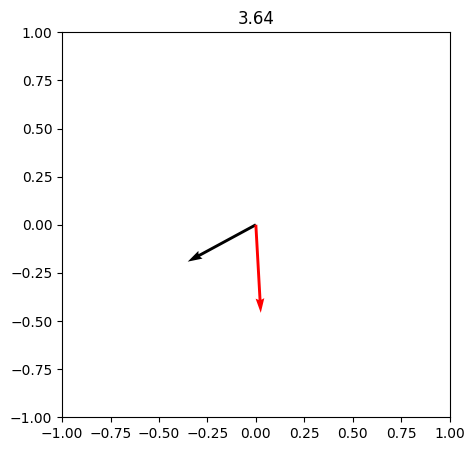

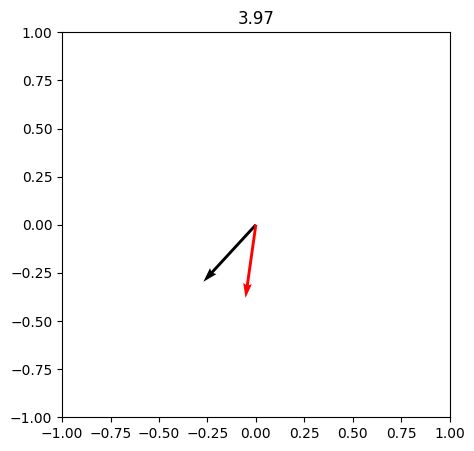

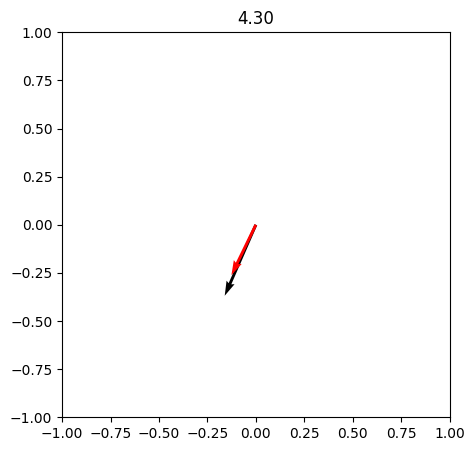

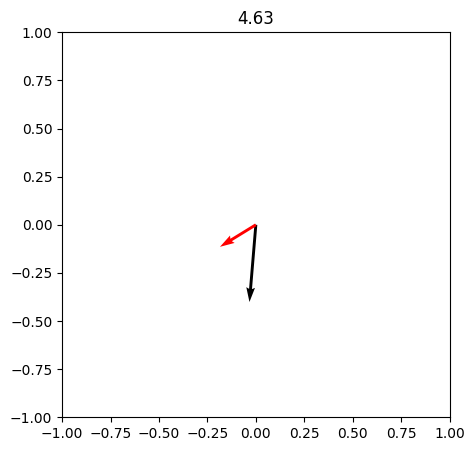

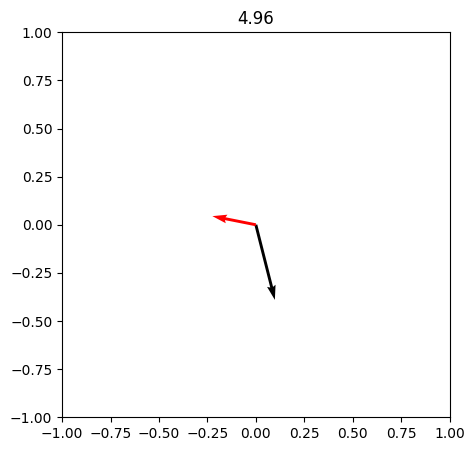

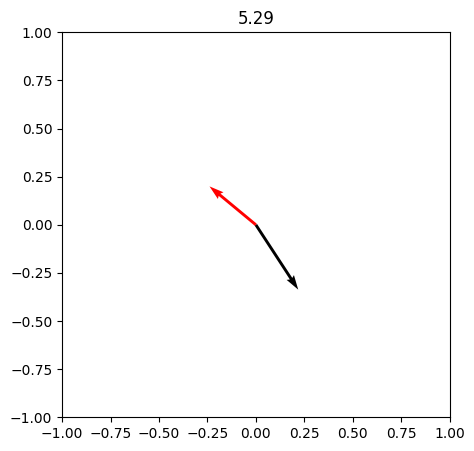

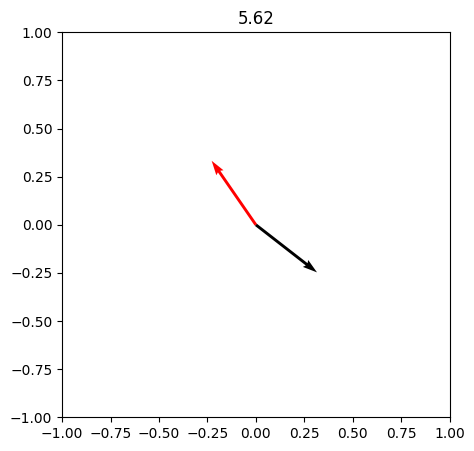

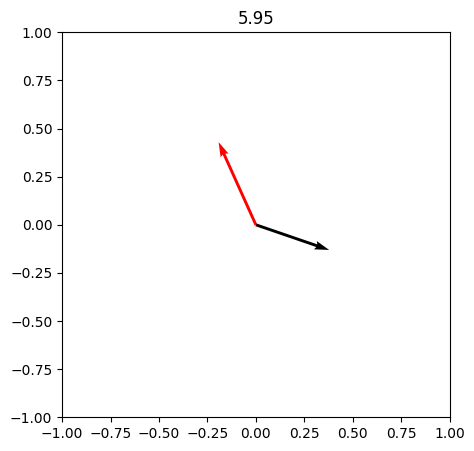

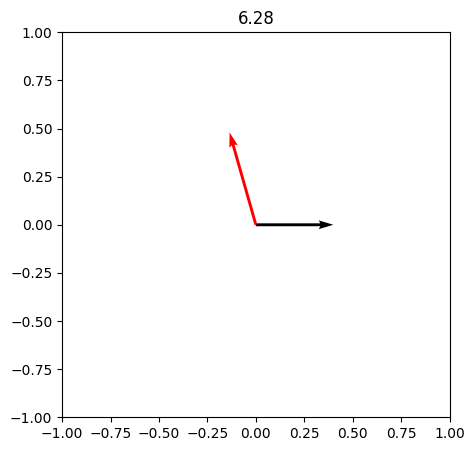

In [50]:
degrees = np.linspace(0, 2 * np.pi, 20)
for degree in degrees:
    fig, ax = plt.subplots(figsize=(5, 5))
    vect = degree2vec(degree)
    vect2 = A @ vect
    ax.quiver(0, 0, vect[0], vect[1], scale=5)
    ax.quiver(0, 0, vect2[0], vect2[1], scale=5, color="r")
    ax.set(xlim=[-1, 1], ylim=[-1, 1], title=f"{degree:.2f}")

$$
\mathbf{A}\mathbf{v} = \mathbf{v}\lambda
$$

In [44]:
vals, vects = np.linalg.eig(A)

In [45]:
vects

array([[-0.6691855 , -0.41746762],
       [ 0.74309539, -0.9086918 ]])

In [46]:
vals

array([-0.88628578,  0.73414006])

[(-1.0, 1.0), (-1.0, 1.0)]

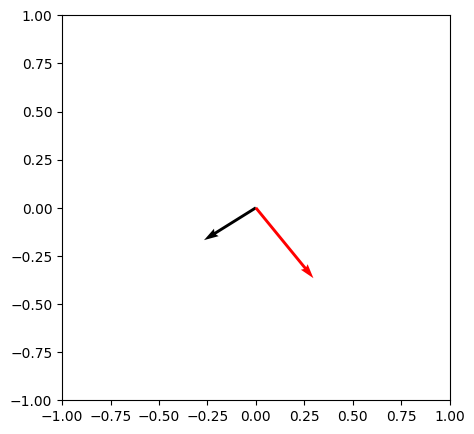

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(0, 0, vects[0, 0], vects[0, 1], scale=5)
ax.quiver(0, 0, vects[1, 0], vects[1, 1], scale=5, color="r")
ax.set(xlim=[-1, 1], ylim=[-1, 1])

In [55]:
A @ vects

array([[ 0.5930896 , -0.30647971],
       [-0.65859488, -0.66710705]])

In [60]:
vects * vals.reshape(1, -1)

array([[ 0.5930896 , -0.30647971],
       [-0.65859488, -0.66710705]])

In [61]:
means = np.zeros(shape=(2, ))
cov = np.random.normal(size=(2, 2))
cov = cov @ cov.T

In [62]:
dist = stats.multivariate_normal(mean=means, cov=cov)

In [63]:
X = dist.rvs(size=(1000,))
X.shape

(1000, 2)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

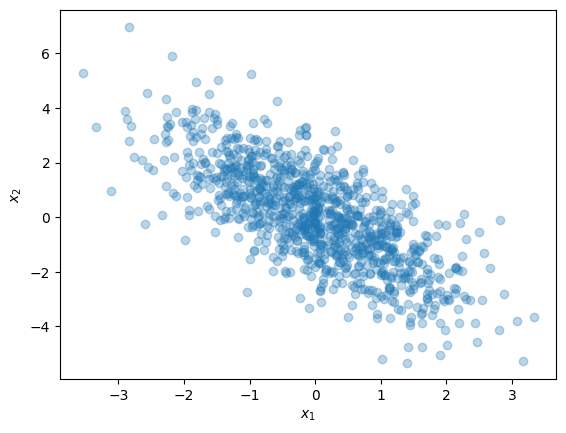

In [75]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

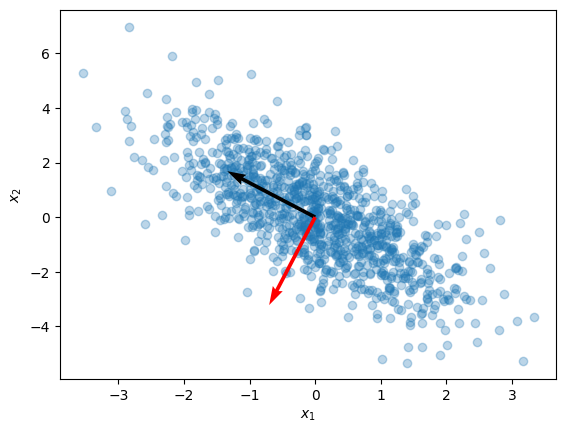

In [76]:
cov = np.cov(X.T)
cov

array([[ 1.24644769, -1.47380785],
       [-1.47380785,  3.29075997]])

In [77]:
vals, vects = np.linalg.eig(cov)
vects

array([[-0.88597365,  0.46373559],
       [-0.46373559, -0.88597365]])

In [78]:
vals

array([0.47502842, 4.06217924])

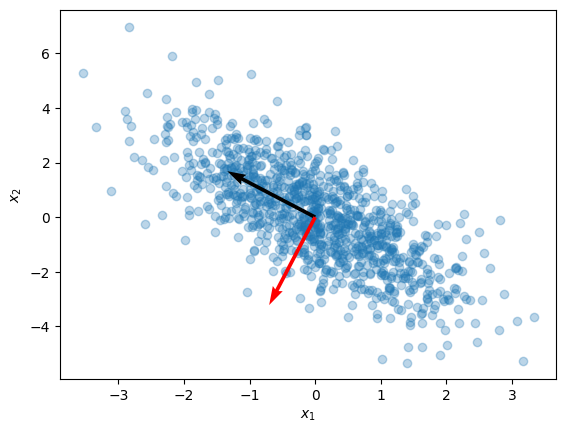

In [79]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")
ax.quiver(0, 0, vects[0, 0], vects[0, 1], scale=5)
ax.quiver(0, 0, vects[1, 0], vects[1, 1], scale=5, color="r")

In [81]:
X_tr = X @ vects

[(-10.0, 10.0), (-10.0, 10.0)]

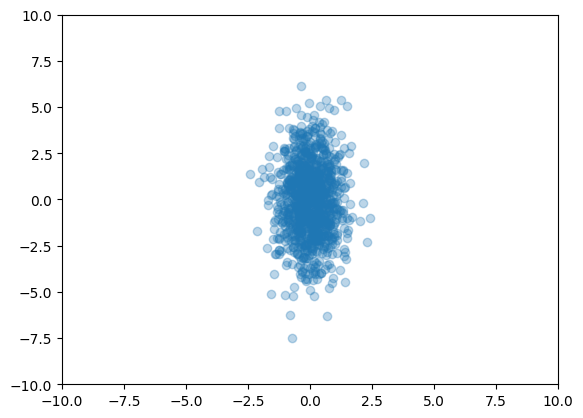

In [83]:
fig, ax = plt.subplots()
ax.scatter(X_tr[:, 0], X_tr[:, 1], alpha=0.3)
ax.set(xlim=[-10, 10], ylim=[-10, 10])

In [84]:
vals

array([0.47502842, 4.06217924])

In [85]:
np.cov(X_tr.T)

array([[4.75028420e-01, 1.35138258e-16],
       [1.35138258e-16, 4.06217924e+00]])

In [86]:
pca = PCA().fit(X)
X_tr = pca.transform(X)

[(-10.0, 10.0), (-10.0, 10.0)]

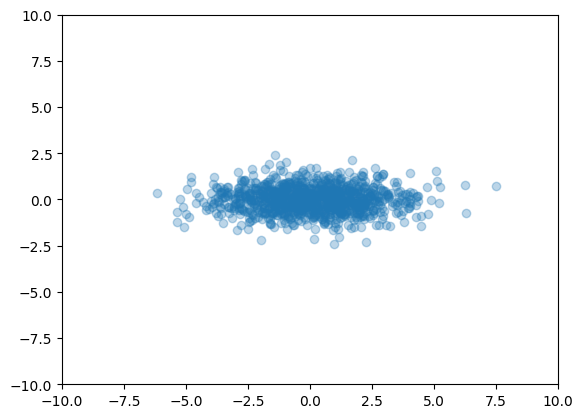

In [89]:
fig, ax = plt.subplots()
ax.scatter(X_tr[:, 0], X_tr[:, 1], alpha=0.3)
ax.set(xlim=[-10, 10], ylim=[-10, 10])

## Ejemplo

In [117]:
words = ["religion", "sports", "computer", "science", "fashion"]

In [118]:
type(model)

gensim.models.keyedvectors.KeyedVectors

In [119]:
words_set = []
for word in words:
    most_similar = model.most_similar(word, topn=10)
    words_set.extend(map(lambda res: res[0], most_similar))

In [120]:
words_set

['christianity',
 'religions',
 'religious',
 'atheism',
 'culture',
 'bible',
 'opinion',
 'philosophy',
 'society',
 'politics',
 'football',
 'soccer',
 'basketball',
 'espn',
 'sport',
 'baseball',
 'nfl',
 'players',
 'golf',
 'hockey',
 'computers',
 'laptop',
 'phone',
 'desktop',
 'screen',
 'keyboard',
 'cell',
 'phones',
 'camera',
 'ipod',
 'physics',
 'research',
 'biology',
 'studies',
 'psychology',
 'math',
 'study',
 'economics',
 'geography',
 'education',
 'clothing',
 'designer',
 'beauty',
 'style',
 'chic',
 'trendy',
 'collection',
 'dress',
 'design',
 'model']

In [121]:
X = model[words_set]
X.shape

(50, 100)

In [122]:
labels = [
    *(0 for _ in range(10)),
    *(1 for _ in range(10)),
    *(2 for _ in range(10)),
    *(3 for _ in range(10)),
    *(4 for _ in range(10)),
    ]

In [123]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [124]:
pca = PCA(n_components=2).fit(X)
X_tr = pca.transform(X)

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

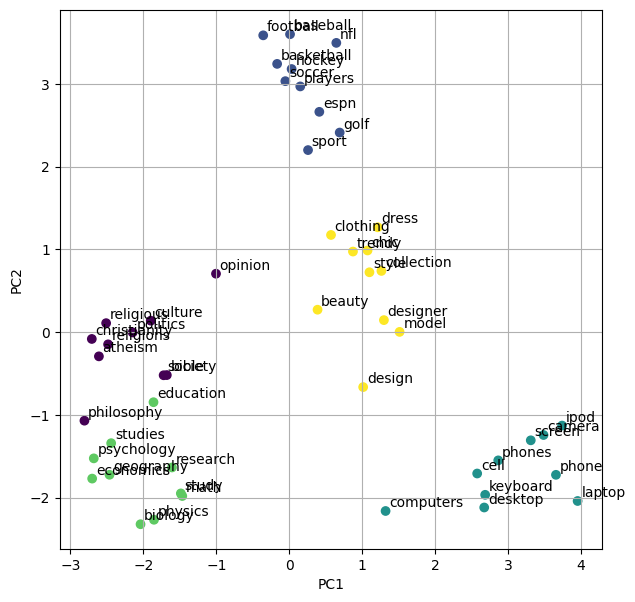

In [125]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_tr[:, 0], X_tr[:, 1], c=labels)
for word, x, y in zip(words_set, X_tr[:, 0], X_tr[:, 1]):
    ax.annotate(
        word, xy = (x + 0.05, y + 0.05),
        xytext=(0, 0), textcoords="offset points"
    )
ax.grid(True)
ax.set(xlabel="PC1", ylabel="PC2")

# Busqueda Semantica

# Similitudes